## Banco de dados DATASET3 - Bearing Classification

### Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np

### Carregamento de arquivos

In [36]:

path_signals = '../../Dados/Rotor_Bearing/Dataset3/bearing_signals.csv/bearing_signals.csv'
df_signals =pd.read_csv(path_signals)

path_classes = '../../Dados/Rotor_Bearing/Dataset3/bearing_signals.csv/bearing_classes.csv'
df_classes =pd.read_csv(path_classes)

### Tratamento dos dados em vetores de entrada

In [13]:
# Assuming your DataFrame is named 'df'
# Extracting columns for the first NumPy array
ids = ['experiment_id', 'bearing_1_id', 'bearing_2_id']
np_ids = df_signals[ids].values

timestamp = df_signals['timestamp'].values

# Extracting columns for the second NumPy array
parameters = ['a1_x', 'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm']
np_parameters = df_signals[parameters].values

print(np_parameters)

[[ 1.13268551e-01  1.49706252e-01 -1.10275164e-01 ...  1.94450071e-01
   4.54298973e-01  0.00000000e+00]
 [-3.67712923e-01 -2.28831731e-01  1.77820560e-01 ...  2.22630479e-03
  -4.39304019e-02  0.00000000e+00]
 [ 1.13268551e-01  1.49706252e-01 -3.98370889e-01 ...  2.22630479e-03
   4.54298973e-01  0.00000000e+00]
 ...
 [ 1.70722560e-02  4.33609740e-01  3.69884377e-01 ... -9.38855783e-02
   1.55361348e-01  1.78748759e+02]
 [ 2.09464845e-01  2.44340748e-01  2.73852469e-01 ...  1.94450071e-01
   1.55361348e-01  1.78748759e+02]
 [ 4.98053729e-01  2.44340748e-01  1.77820560e-01 ...  2.90561954e-01
  -2.43222152e-01  1.78748759e+02]]


#### Visualização dos sinais


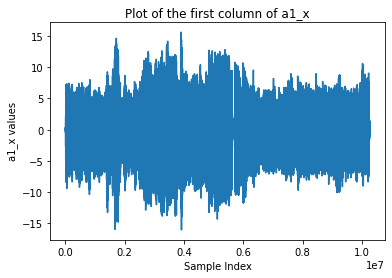

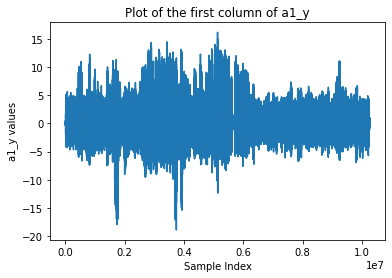

In [35]:
import matplotlib.pyplot as plt


plt.plot(np_parameters[:, 0])
plt.xlabel('Sample Index')
plt.ylabel('a1_x values')
plt.title('Plot of the first column of a1_x')
plt.show()

plt.plot(np_parameters[:, 1])
plt.xlabel('Sample Index')
plt.ylabel('a1_y values')
plt.title('Plot of the first column of a1_y')
plt.show()



[  0.           0.           0.         ... 178.74875869 178.74875869
 178.74875869]


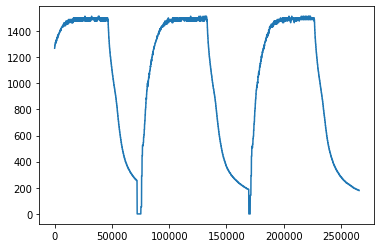

In [34]:
print(abs(np_parameters[:, -1]))

plt.plot(abs(np_parameters[:, -1][10000000::]))
plt.show()


### Aplicação de técnicas de pré-processamento de sinais - Filtros

In [ ]:
## Passa-baixa


## Passa-alta


## 60Hz


### Aplicação de técnicas de processamento de sinais - Cálculos estatísticos

### Aplicação de técnicas de inteligência artificial

### Gráficos - Apresentação dos resultados